In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge

np.random.seed(500)
x=np.sort(np.random.uniform(0,1,20)).reshape(-1,1)
N=np.random.normal(0,0.1,x.shape)
y=np.sin(2*np.pi*x)+N

x_train=x[1::2,:]
y_train=y[1::2,:]
x_test=x[0::2,:]
y_test=y[0::2,:]
data_pair=np.hstack((x_train,y_train)) 
print(data_pair)


[[ 0.08511062  0.55372933]
 [ 0.31647204  1.02111884]
 [ 0.34233845  0.84971138]
 [ 0.36563683  0.84768649]
 [ 0.44849744  0.43330783]
 [ 0.45953222  0.09354256]
 [ 0.49707753 -0.00365816]
 [ 0.6666116  -0.90706538]
 [ 0.85062578 -0.64032191]
 [ 0.91749612 -0.47233468]]


In [2]:
weights=[]
y_predict=[]
names=[]
for deg in ((0,1,3,9)):
    poly_reg=PolynomialFeatures(degree=deg)
    x_train_poly=poly_reg.fit_transform(x_train)
    x_test_poly=poly_reg.fit_transform(x_test)
    #print(x_poly)

    lin_poly_reg=LinearRegression()
    lin_poly_reg.fit(x_train_poly,y_train)

    model_poly=lin_poly_reg.predict(x_test_poly)
    #print(model_poly)
    #print(lin_poly_reg.coef_)
    y_predict.append(model_poly)
    weights.append(np.round(np.squeeze(lin_poly_reg.coef_,axis=0),2))
    names.append('M='+str(deg))

print(weights)
print(names)    





[array([0.]), array([ 0.  , -2.17]), array([  0.  ,  14.99, -42.65,  28.75]), array([ 0.00000000e+00, -2.73166320e+05,  3.06805472e+06, -1.85598492e+07,
        6.80538375e+07, -1.58567596e+08,  2.36245442e+08, -2.17863352e+08,
        1.13143738e+08, -2.52642661e+07])]
['M=0', 'M=1', 'M=3', 'M=9']


In [3]:
print('   | ','M=0'.rjust(10,' '),'M=1'.rjust(10,' '),'M=3'.rjust(10,' '),'M=9'.rjust(20,' '))
print('-----------------------------------------------------------------------------------')
print('w0 | ',str(weights[0][0]).rjust(10,' '),str(weights[1][0]).rjust(10,' '),str(weights[2][0]).rjust(10,' '),str(weights[3][0]).rjust(20,' '))
print('w1 | ',' '.rjust(10,' '),str(weights[1][1]).rjust(10,' '),str(weights[2][1]).rjust(10,' '),str(weights[3][1]).rjust(20,' '))
print('w2 | ',' '.rjust(10,' '),' '.rjust(10,' '),str(weights[2][2]).rjust(10,' '),str(weights[3][2]).rjust(20,' '))
print('w3 | ',' '.rjust(10,' '),' '.rjust(10,' '),str(weights[2][3]).rjust(10,' '),str(weights[3][3]).rjust(20,' '))
print('w4 | ',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][4]).rjust(20,' '))
print('w5 | ',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][5]).rjust(20,' '))
print('w6 | ',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][6]).rjust(20,' '))
print('w7 | ',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][7]).rjust(20,' '))
print('w8 | ',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][8]).rjust(20,' '))
print('w9 |',' '.rjust(10,' '),' '.rjust(10,' '),' '.rjust(10,' '),str(weights[3][9]).rjust(20,' '))

   |         M=0        M=1        M=3                  M=9
-----------------------------------------------------------------------------------
w0 |         0.0        0.0        0.0                  0.0
w1 |                  -2.17      14.99           -273166.32
w2 |                            -42.65           3068054.72
w3 |                             28.75         -18559849.22
w4 |                                            68053837.47
w5 |                                           -158567595.9
w6 |                                            236245442.4
w7 |                                          -217863351.82
w8 |                                           113143738.41
w9 |                                           -25264266.1


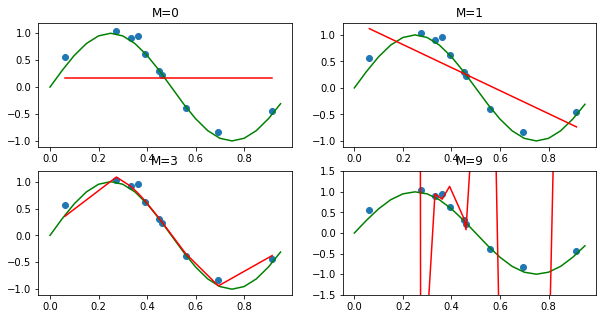

In [4]:
fig,axs=plt.subplots(2,2,figsize=(10,5))
x_plot=np.arange(0,1,0.05)
y_plot=np.sin(2*np.pi*x_plot)
plt.ylim(-1.5,1.5)
for i in range(len(y_predict)):
    #plt.subplot(2,2,i+1)
    row=int(i/2)
    col=i%2
    
    #plt.title(names[i])
    axs[row,col].plot(x_plot,y_plot,color='green')
    axs[row,col].plot(x_test,y_predict[i],color='red')
    axs[row,col].scatter(x_test,y_test)
    axs[row,col].set_title(names[i])
   
   

(0, 1)

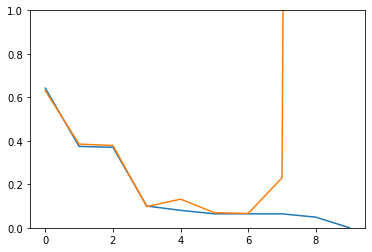

In [5]:
weights=[]
y_predict=[]
names=[]
train_error=[]
test_error=[]
for deg in range(10):
    poly_reg=PolynomialFeatures(degree=deg)
    x_train_poly=poly_reg.fit_transform(x_train)
    x_test_poly=poly_reg.fit_transform(x_test)
    #print(x_poly)

    lin_poly_reg=LinearRegression()
    lin_poly_reg.fit(x_train_poly,y_train)
    
    model_poly_train=lin_poly_reg.predict(x_train_poly)
    model_poly_test=lin_poly_reg.predict(x_test_poly)
    
    error_train_temp=np.sqrt((((y_train-model_poly_train)**2).sum())/y_train.shape[0])
    error_test_temp=np.sqrt((((y_test-model_poly_test)**2).sum())/y_test.shape[0])
    train_error.append(error_train_temp)
    test_error.append(error_test_temp)
plt.plot(train_error)
plt.plot(test_error)
plt.ylim(0,1)

    


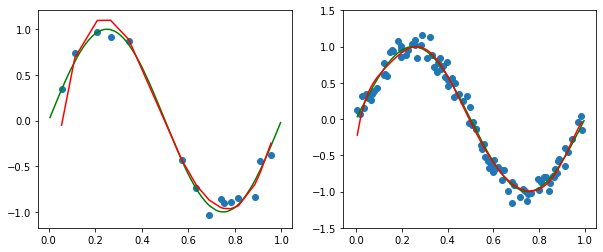

In [6]:
x_more_data=[]
y_predict_more_data=[]
y_more_data=[]
for i in ((30,200)):    
    x_data=np.sort(np.random.uniform(0,1,i)).reshape(-1,1)
    N_data=np.random.normal(0,0.1,x_data.shape)
    y_data=np.sin(2*np.pi*x_data)+N_data

    x_train_data=x_data[1::2,:]
    y_train_data=y_data[1::2,:]
    x_test_data=x_data[0::2,:]
    y_test_data=y_data[0::2,:]

    poly_reg=PolynomialFeatures(degree=9)
    x_train_poly_data=poly_reg.fit_transform(x_train_data)
    x_test_poly_data=poly_reg.fit_transform(x_test_data)
    #print(x_poly)

    lin_poly_reg=LinearRegression()
    lin_poly_reg.fit(x_train_poly_data,y_train_data)

    model_poly_test=lin_poly_reg.predict(x_test_poly_data)
    y_predict_more_data.append(model_poly_test)
    x_more_data.append(x_test_data)
    y_more_data.append(y_test_data)
    
fig,axs=plt.subplots(1,2,figsize=(10,4))
print(axs)
plt.ylim(-1.5,1.5)
for i in range(len(y_predict_more_data)):
    #plt.subplot(2,2,i+1)
    #row=int(i/2)
    col=i
    
    #plt.title(names[i])
    axs[col].plot(x_data,np.sin(2*np.pi*x_data),color='green')
    axs[col].plot(x_more_data[i],y_predict_more_data[i],color='red')
    axs[col].scatter(x_more_data[i],y_more_data[i])
    #axs[col].set_title(names[i])
   

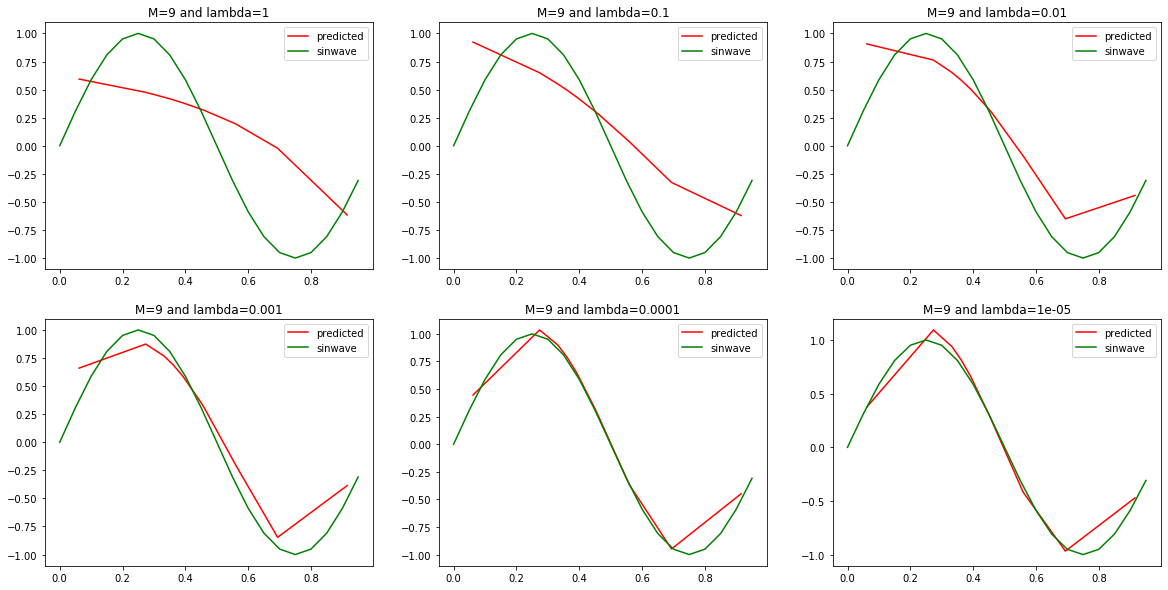

In [7]:
lambdas = [1,0.1,0.01,0.001,0.0001,0.00001]
f,ax=plt.subplots(2,3,figsize=(20,10))

for i,a in enumerate(lambdas):
    poly_reg=PolynomialFeatures(degree=deg)
    x_train_poly=poly_reg.fit_transform(x_train)
    x_test_poly=poly_reg.fit_transform(x_test)


    ridge_poly_reg=Ridge(alpha=a)
    ridge_poly_reg.fit(x_train_poly,y_train)

    model_poly=ridge_poly_reg.predict(x_test_poly)
    row=int(i/3)
    col=i%3
    ax[row,col].set_title('M=9 and lambda='+str(a))
    ax[row,col].plot(x_test,model_poly,color='red',label='predicted')
    ax[row,col].plot(x_plot,y_plot,color='green',label='sinwave')
    ax[row,col].legend()
    


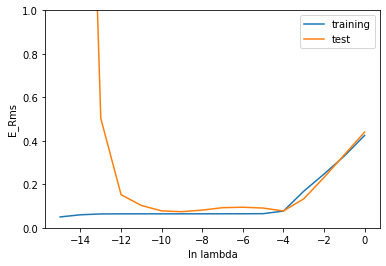

In [8]:
train_error=[]
test_error=[]
log_lambdas=[]
for a in range(0,-16,-1):
    poly_reg=PolynomialFeatures(degree=deg)
    x_train_poly=poly_reg.fit_transform(x_train)
    x_test_poly=poly_reg.fit_transform(x_test)
    log_lambdas.append(a)
    value=pow(10,a)
   
    ridge_poly_reg=Ridge(alpha=value)
    ridge_poly_reg.fit(x_train_poly,y_train)
    

    model_poly_train=ridge_poly_reg.predict(x_train_poly)
    model_poly_test=ridge_poly_reg.predict(x_test_poly)
    
    error_train_temp=np.sqrt((((y_train-model_poly_train)**2).sum())/y_train.shape[0])
    error_test_temp=np.sqrt((((y_test-model_poly_test)**2).sum())/y_test.shape[0])
    train_error.append(error_train_temp)
    test_error.append(error_test_temp)
plt.plot(log_lambdas,train_error,label='training')
plt.plot(log_lambdas,test_error,label='test')
plt.ylim(0,1)
plt.xlabel('ln lambda')
plt.ylabel('E_Rms')
plt.legend()

In [9]:
# I used Linear regression with polynomial features for polynomial regression.
# I used Ridge regression with polynomial features for regularization.
# Based on my test scenarios i found the best lambda for degree 9 is 10^-4(0.0001),
# With this lambda value i find there is no difference in test error and train error.
# At the same time we can observe that in the previous sectional graph(i.e.,for different lambdas) also 
# the predicted test graph almost follows the original sin wave(expected data).
# Both of these proves that lambda's best value is 10^-4.